# [WSI] Ćwiczenie nr 1
Mikołaj Wewiór 318407

In [31]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt


class Function:

    def __init__(self, domain, dimensions, beta, initial_position):
        self._domain = domain
        self._dimensions = dimensions
        self._beta = beta
        self._current_position = initial_position


    def d(self):
        return self._dimensions

    def position(self):
        return self._current_position

    def set_position(self, new_position):
        self._current_position = new_position

    def beta(self):
        return self._beta


    def grad(self, x_vector, i):
        return None


    def update_position(self):
        min_bound = self._domain[0]
        max_boud = self._domain[1]
        d = self.d()
        x = copy.deepcopy(self.position())
        for i in range(d):
            upd = self.beta()*self.grad(x, i)
            x[i] = x[i] - upd
            if x[i] < min_bound:
                x[i] = min_bound
            if x[i] > max_boud:
                x[i] = max_boud

        self.set_position(x)
        return x


In [32]:
class Rastrigin(Function):

    def __init__(self, domain, dimensions, beta, initial_position):
        super().__init__(domain, dimensions, beta, initial_position)

    def name(self):
        return "Rastrigin"

    def q(self, x_vector):
        d = self._dimensions
        partial_cost = lambda x: x**2 - 10*math.cos(2*math.pi*x)

        cost = 10*d
        for i in range(d) : cost += partial_cost(x_vector[i])

        return cost

    def f(self, x):
        return self.q(x)

    def grad(self, x_vector, i):
        x = x_vector[i]
        gradient = 2*x +20*math.pi*math.sin(2*math.pi*x)
        return gradient


In [33]:
class Griewank(Function):

    def __init__(self, domain, dimensions, beta, initial_position):
        super().__init__(domain, dimensions, beta, initial_position)

    def name(self):
        return "Griewank"

    def q(self, x_vector):
        d = self._dimensions

        SUM = 0
        for i in range(d):
            SUM += x_vector[i]**2
        SUM = SUM / 4000

        PI = 1
        for i in range(d):
            PI = PI*math.cos(
                x_vector[i]*math.sqrt(i+1)/(i+1)
            )

        return SUM - PI + 1


    def grad(self, x_vector, i):
        x = x_vector
        PI_rest = 1
        for j in range(self.d()):
            if j != i:
                PI_rest = PI_rest*math.cos(
                    x[j]*math.sqrt(j+1)/(j+1)
                )

        return x[i]/2000 + math.sin(x[i]*math.sqrt(i+1)/(i+1)) * PI_rest*math.sqrt(i+1)/(i+1)


In [34]:
class Test:
    def __init__(self, max_iterations, function):
        self._max_iterations = max_iterations
        self._function = function

    def max_interations(self):
        return self._max_iterations

    def function(self):
        return self._function

    def initial_position(self):
        return self.function().position()

    def do_test(self):
        this_func = self.function()
        route_x = []
        route_y = []
        route_q = []
        for t in range(self.max_interations()):
            route_x.append(this_func.position()[0])
            route_y.append(this_func.position()[1])
            route_q.append(this_func.q(this_func.position()))
            this_func.update_position()

        return route_x, route_y, route_q


In [35]:
class Plotter:
    def __init__(self, dimensions, steps, name):
        self._dimensions = dimensions
        self._steps = steps
        self._name = name


    def name(self):
        return self._name

    def d(self):
        return self._dimensions

    def steps(self):
        return self._steps

    def bounds(self):
        if self.name() == "Rastrigin":
            return [-5.12, 5.12]
        else:
            return [-5, 5]

    def q(self, x_vector):
        d = self.d()
        if self.name() == "Rastrigin":
            partial_cost = lambda x: x**2 - 10*math.cos(2*math.pi*x)
            cost = 10*d

            for i in range(d) : cost += partial_cost(x_vector[i])

            return cost

        if self.name() == "Griewank":
            SUM = 0
            for i in range(d):
                SUM += x_vector[i]**2
            SUM = SUM / 4000

            PI = 1
            for i in range(d):
                PI = PI*math.cos(
                    x_vector[i]*math.sqrt(i+1)/(i+1)
                )

            return SUM - PI + 1


    def plot_route(self, route_x, route_y):
        plt.scatter(route_x[1:-1], route_y[1:-1])
        plt.plot(route_x, route_y)
        plt.scatter(route_x[0], route_y[0], color="white")
        plt.scatter(route_x[-1], route_y[-1], color="red")


    def plot(self, route_x=None, route_y=None):
        step = self.steps()
        bounds = self.bounds()
        diff = bounds[1] - bounds[0]
        Z = np.zeros((step+1, step+1))
        for i in range(step+1):
            y = bounds[0] + i*diff/step
            for j in range(step+1):
                x = bounds[0] + j*diff/step
                # meshgrid[i].append(q(d, [x, y]))
                # if(x == 0 and y < 0 and y > -1):
                #     print('jestem')
                #     continue
                Z[i][j] = self.q([x, y])

        x = np.linspace(bounds[0], bounds[1], step+1)
        y = np.linspace(bounds[0], bounds[1], step+1)

        X, Y = np.meshgrid(x, y)

        plt.figure()
        plt.ion()
        contour = plt.contourf(X, Y, Z, cmap="plasma", levels=100)
        # contour = plt.contourf(Y, X, Z, cmap="plasma", levels=100)

        # Dodanie kolorowej skali
        cbar = plt.colorbar(contour)
        cbar.set_label("Function value")

        plt.grid(True)
        plt.xlabel("X")
        plt.ylabel("Y")

        if not (route_x == None or route_y == None):
            self.plot_route(route_x, route_y)

        plt.show()






# HEATMAPA FUNKCJI

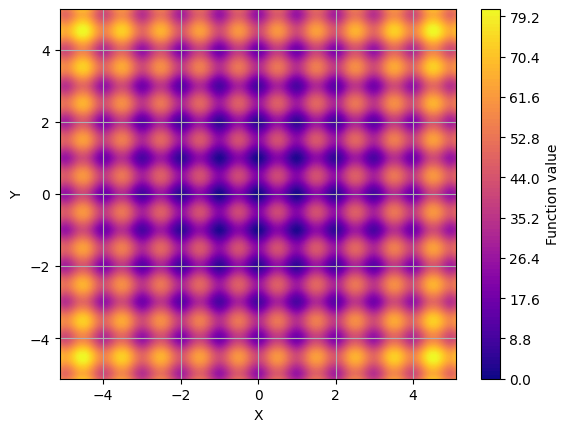

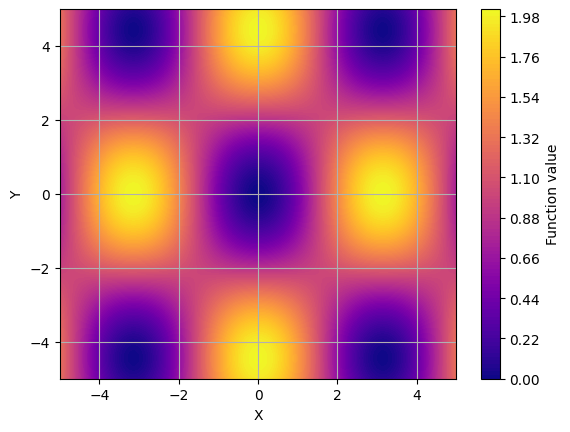

In [44]:
# %matplotlib inline
# %matplotlib ipympl

RastriginPlot = Plotter(2, 400, "Rastrigin")
RastriginPlot.plot()

GriewankPlot = Plotter(2, 400, "Griewank")
GriewankPlot.plot()


# TESTY pętla

## Greiwank

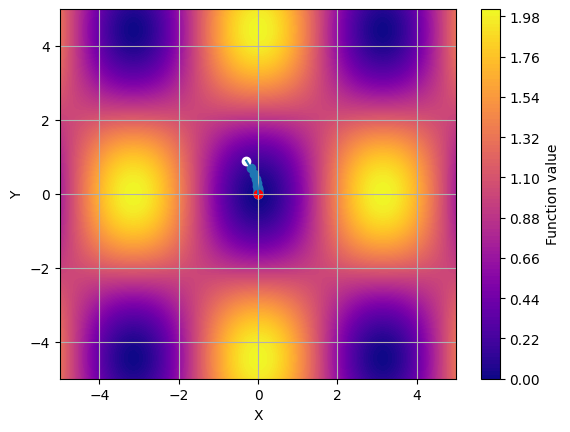

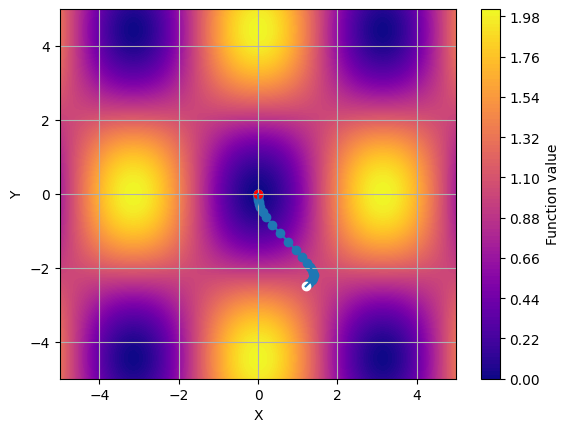

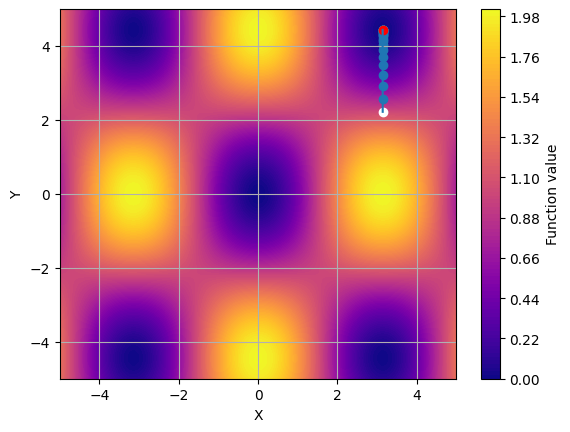

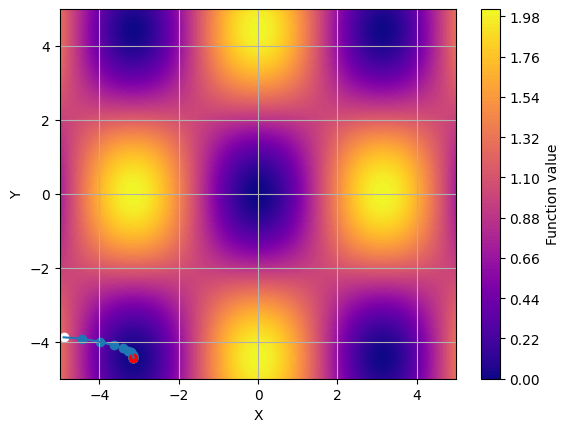

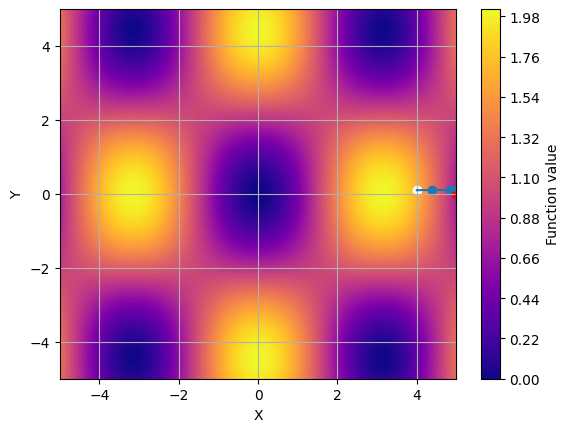

In [46]:
bounds = [-5.0, 5.0]
dimensions = 2
x_init = [
    [-0.3, 0.9],
    [1.2, -2.5],
    [math.pi, math.pi/math.sqrt(2)],
    [-4.9, -3.88],
    [4, 0.1]
]


beta = 0.5
steps = 400

for i in range(len(x_init)):
    function = Griewank(bounds, dimensions, beta, x_init[i])
    test = Test(50, function)
    route_x, route_y, route_q = test.do_test()
    plot = Plotter(dimensions, steps, test.function().name())
    plot.plot(route_x, route_y)



## Rastrigin

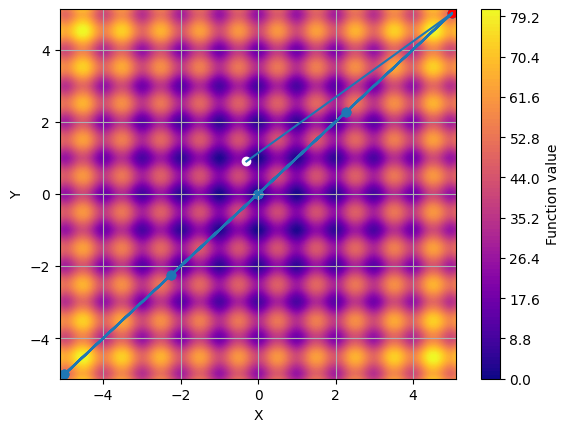

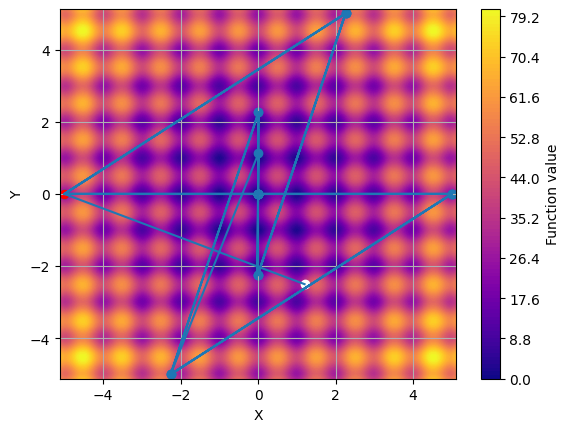

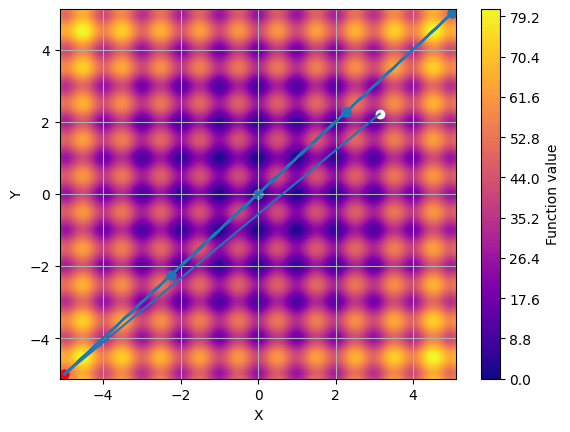

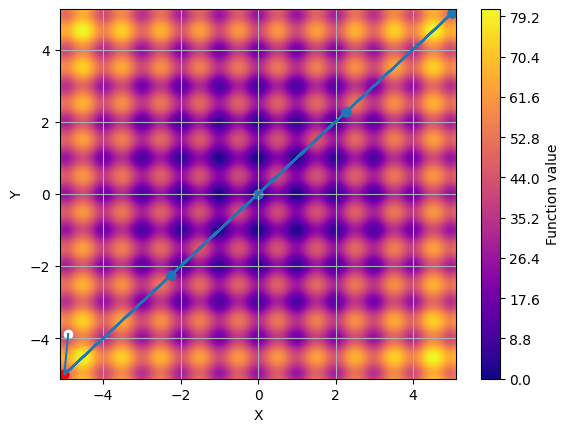

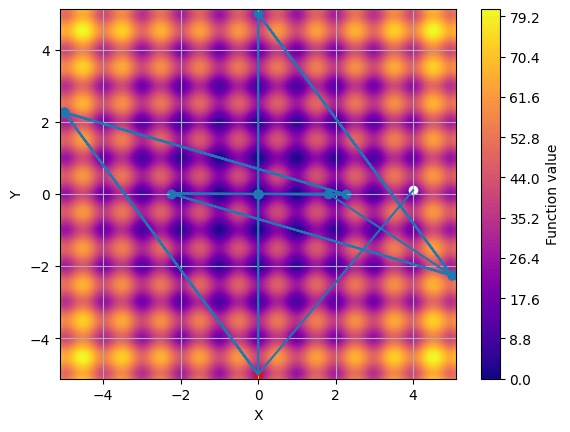

In [47]:
bounds = [-5.0, 5.0]
dimensions = 2
x_init = [
    [-0.3, 0.9],
    [1.2, -2.5],
    [math.pi, math.pi/math.sqrt(2)],
    [-4.9, -3.88],
    [4, 0.1]
]


beta = 0.5
steps = 400

for i in range(len(x_init)):
    function = Rastrigin(bounds, dimensions, beta, x_init[i])
    test = Test(50, function)
    route_x, route_y, route_q = test.do_test()
    plot = Plotter(dimensions, steps, test.function().name())
    plot.plot(route_x, route_y)



# BADANIA

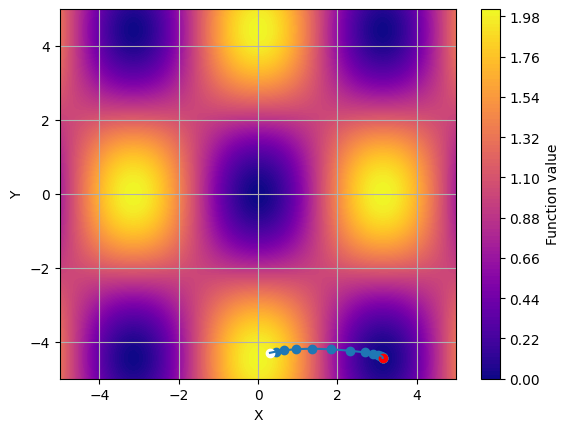

3.140022633889442
-4.438443621624848
0.007396040334299969
[0.3, 0.44693159427438617, 0.6612466284564826, 0.964693506343766, 1.3693402556684442, 1.8508753924600336, 2.324052726553742, 2.6845693712967718, 2.9031930736853466, 3.0201205224108505, 3.079827211525857, 3.1098832781714485, 3.1249466669179355, 3.1324845547175144, 3.1362542691014053, 3.138138969702322, 3.1390811039231723, 3.139552027100515, 3.1397874079652075, 3.1399050565252544, 3.1399638601547712, 3.1399932522480074, 3.1400079439861432, 3.1400152881354257, 3.140018959676542, 3.1400207954220396, 3.1400217134607353, 3.1400221726949913, 3.140022402517324, 3.1400225176036884, 3.1400225752884965, 3.14002260424199, 3.140022618804348, 3.140022626150801, 3.1400226298734686, 3.1400226317720983, 3.140022632749476, 3.140022633259248, 3.1400226335299584, 3.1400226336771837, 3.140022633759698, 3.1400226338076296, 3.1400226338365993, 3.140022633854835, 3.140022633866765, 3.140022633874838, 3.140022633880455, 3.140022633884448, 3.140022633887

In [45]:
# x_init = [-0.6, 2.132]
# x_init = [-4, -2]
# x_init = [3.8, -3]
# x_init = [2, -3.3]
x_init = [0.3, -4.3]
rast = Rastrigin([-5.12, 5.12], 2, 0.005, x_init)
gierek = Griewank([-5.0, 5.0], 2, 0.5, x_init)

test1 = Test(50, gierek)
route_x, route_y, route_q = test1.do_test()

one = Plotter(2, 400, test1.function().name())
one.plot(route_x, route_y)
# one.plot_route(route_x, route_y)

print(route_x[-1])
print(route_y[-1])
print(route_q[-1])

print(route_x)
print(route_y)
print(route_q)

# TESTOWE

dla mnie, nie do sprawozdania :(

In [38]:
def q(d, x_vector):
    partial_cost = lambda x: x**2 - 10*math.cos(2*math.pi*x)
    cost = 2*d
    for i in range(d) : cost += partial_cost(x_vector[i])
    return cost


def test(d, x1, x2):

    x_vector = [x1, x2]

    # print(10*d)
    # partial_cost = lambda x: x**2
    print(1)
    partial_cost = lambda x: x**2/4000
    bleh = partial_cost(x1)
    print(bleh)
    blah = partial_cost(x2)
    print(blah)

    # cost = 10*d
    # for i in range(d) : cost += partial_cost(x_vector[i])
    cost = 1
    for i in range(d) : cost += partial_cost(x_vector[i])

    return cost


# test(2, 4000, 8000)

[-4, -4.058009288662987, -4.0596254239865575, -4.001288071407906, -3.8862227996966774, -3.728571685273543, -3.5568181406211936, -3.4051679434462434, -3.2944224678014384, -3.2245634637550395, -3.184562518112286, -3.162956679662112, -3.151674977195941, -3.1458972814648463, -3.1429710303911147, -3.1414984028035917, -3.1407600626911103, -3.1403907010597423, -3.14020618344671, -3.1401140948543733, -3.140068169998547, -3.140045282759004, -3.140033884773586, -3.1400282132604436, -3.1400253941533816, -3.140023994829255, -3.140023301569477, -3.1400229590316235, -3.140022790436123, -3.1400227079230962, -3.1400226678823766, -3.1400226487054383, -3.1400226397113595, -3.14002263563879, -3.1400226339089348, -3.1400226332671526, -3.140022633109876, -3.1400226331518457, -3.1400226332621024, -3.1400226333835164, -3.1400226334935595, -3.1400226335853683, -3.1400226336587402, -3.1400226337159562, -3.140022633759921, -3.1400226337933974, -3.1400226338187416, -3.14002263383786, -3.1400226338522486, -3.1400

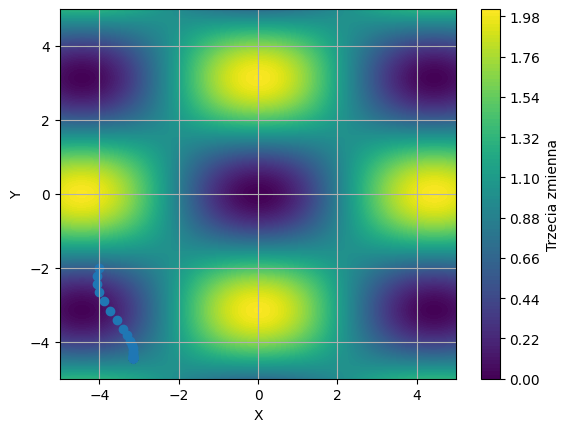

In [39]:
def q(d, x_vector):

    SUM = 0
    for i in range(d):
        SUM += x_vector[i]**2/4000

    PI = 1
    for i in range(d):
        PI = PI*math.cos(x_vector[i]/math.sqrt(i+1))

    return SUM - PI + 1

max_boud = 5
min_bound = -5
diff = max_boud-min_bound
step = 200

bounds = [-5, 5]

# meshgrid = []
d = 2
Z = np.zeros((201, 201))
for i in range(step+1):
    # meshgrid.append([])
    x = min_bound + i*diff/step
    for j in range(step+1):
        y = min_bound + j*diff/step
        # meshgrid[i].append(q(d, [x, y]))
        Z[i][j] = q(d, [x, y])

x = np.linspace(-5, 5, 201)
y = np.linspace(-5, 5, 201)

X, Y = np.meshgrid(x, y)


# plt.pcolor(X, Y, Z)
# plt.show()
plt.ion()
fig = plt.figure()
contour = plt.contourf(X, Y, Z, cmap="viridis", levels=100)

# Dodanie kolorowej skali
cbar = plt.colorbar(contour)
cbar.set_label("Trzecia zmienna")

plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")



x_init = [-4, -2]
racik = Rastrigin([-5.12, 5.12], 2, 0.01, x_init)
gierek = Griewank([-5, 5], 2, 0.5, x_init)

route = [[gierek.position(), gierek.q(x_init)]]
route_x = [gierek.position()[0]]
route_y = [gierek.position()[1]]
for t in range(800):
    gierek.update_position()
    route.append([gierek.position(), gierek.q(gierek.position())])
    route_x.append(gierek.position()[0])
    route_y.append(gierek.position()[1])

plt.scatter(route_x, route_y)

print(route_x)
print(route_y)

# Polecenie

Eksperymenty powinny zawierać między innymi: testy różnych wartości parametrów uczenia (BETA, patrz slajdy z wykładu), oraz różne punkty inicjalizacji (blisko optimum, daleko od optimum). W czasie zajęć proszę pokazać zbieżność dla funkcji: <br>
f(x) = SUM_i^d (x_1)^2